In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 20A4-112C

 Directory of C:\Users\LENOVO\Desktop\Machine Learning Associate

06-07-2024  18:12    <DIR>          .
06-07-2024  18:12    <DIR>          ..
06-07-2024  18:08    <DIR>          .ipynb_checkpoints
06-07-2024  18:10             5,166 Advertising.csv
30-06-2024  18:34           969,713 data visualization.ipynb
14-03-2024  16:35            61,194 data.csv
06-07-2024  18:12               810 Linear Regression.ipynb
23-06-2024  20:45         3,543,975 Numpy.ipynb
29-06-2024  19:50           781,911 Pandas.ipynb
               6 File(s)      5,362,769 bytes
               3 Dir(s)  17,806,770,176 bytes free


In [3]:
data = pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.drop("Unnamed: 0", axis = 1, inplace = True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
# 1.  understanding the business cases and domain analysis


In [ ]:
# 2. Basic checks on data and EDA


In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: xlabel='TV', ylabel='Count'>

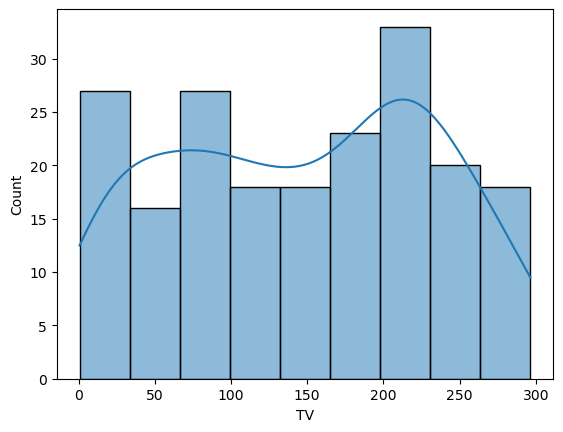

In [11]:
#EDA: Exploratory Data Analysis

# 2.1. univariate analysis

#TV
sns.histplot(x= data["TV"],kde=True)

<Axes: xlabel='Radio', ylabel='Count'>

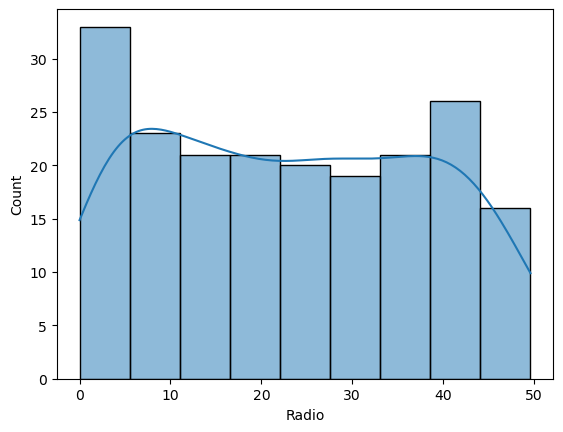

In [12]:
#Radio
sns.histplot(x= data["Radio"],kde=True)

<Axes: xlabel='Newspaper', ylabel='Count'>

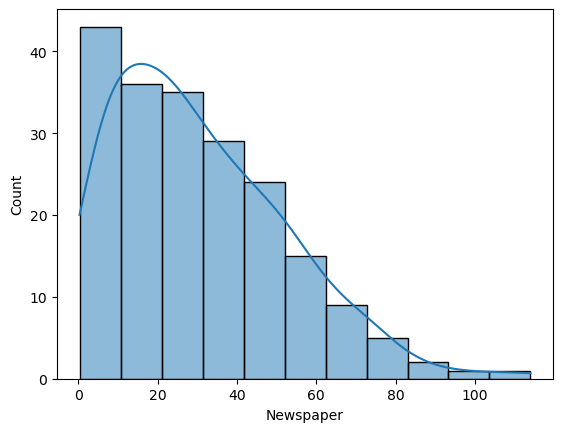

In [13]:
#Newspaper
sns.histplot(x= data["Newspaper"],kde=True)

<Axes: xlabel='TV', ylabel='Sales'>

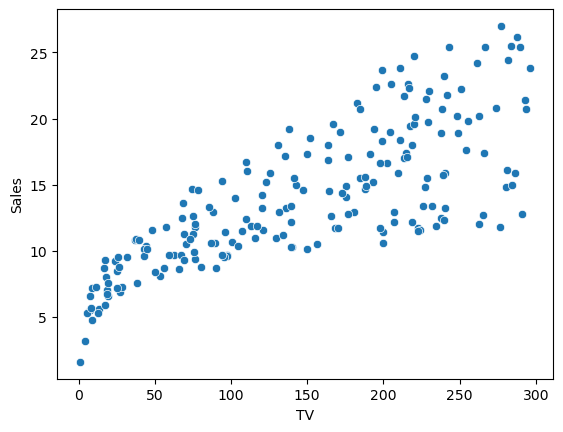

In [14]:
# 2.2. Bivariate analysis

# analysing TV and Sales

sns.scatterplot(data=data, x= "TV", y= "Sales")

<Axes: xlabel='Radio', ylabel='Sales'>

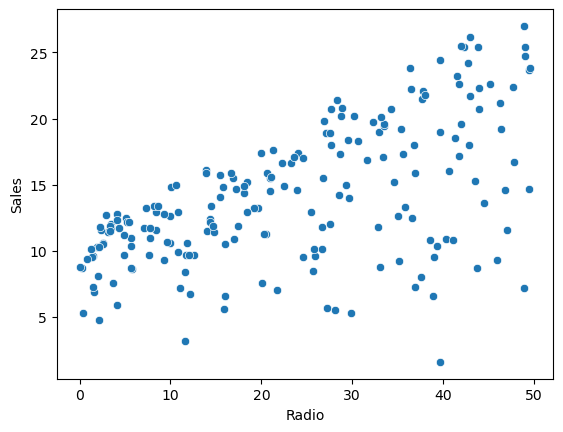

In [15]:
# analysing Radio and Sales

sns.scatterplot(data=data, x= "Radio", y= "Sales")

<Axes: xlabel='Newspaper', ylabel='Sales'>

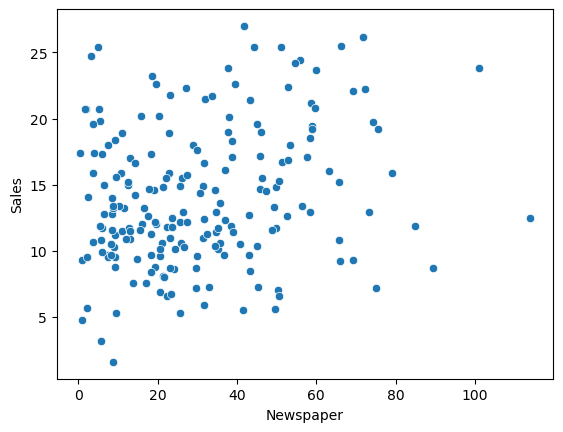

In [16]:
# analysing Newspaper and Sales

sns.scatterplot(data=data, x= "Newspaper", y= "Sales")

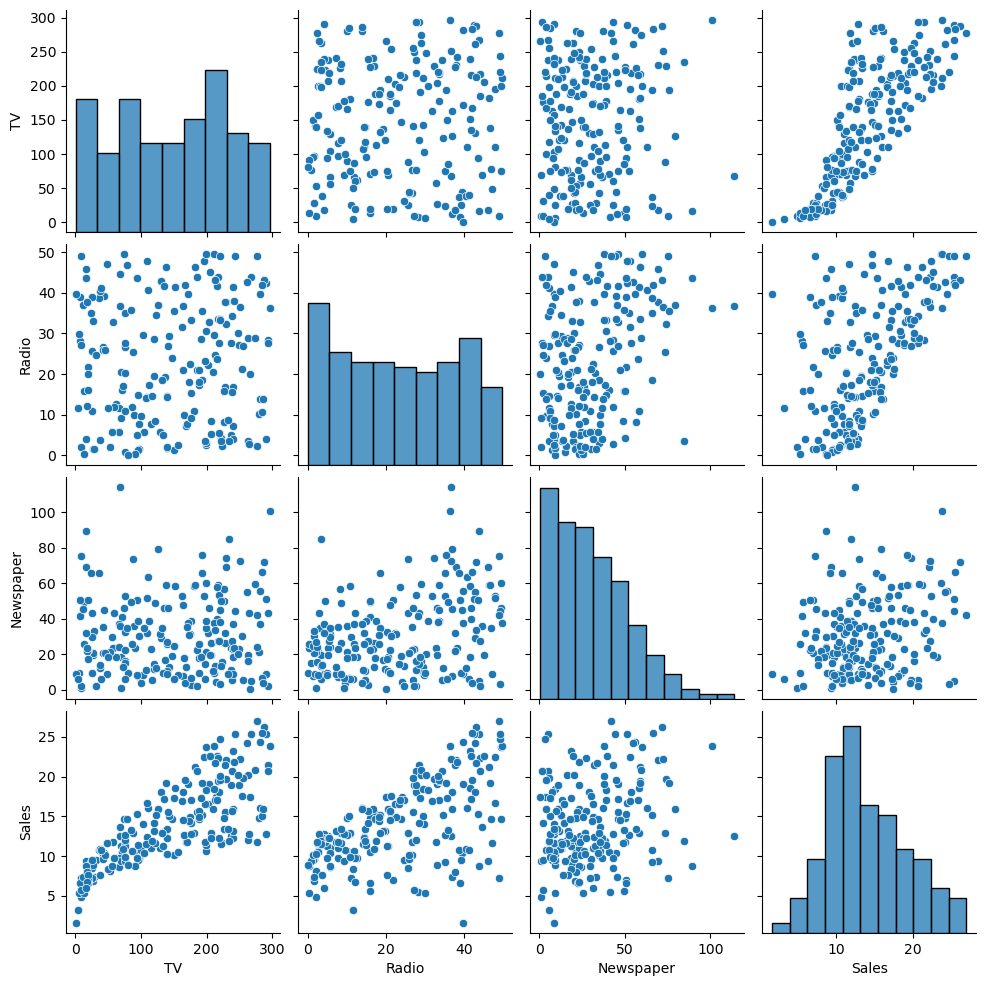

In [17]:
# 2.3. Multivariate analysis

sns.pairplot(data)

In [20]:
# 3. Data Preprocessing

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='TV'>

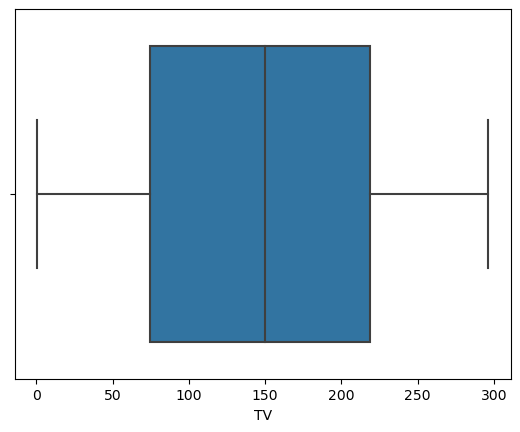

In [22]:
# outlier detection

#Tv
sns.boxplot(data= data, x="TV")

<Axes: xlabel='Radio'>

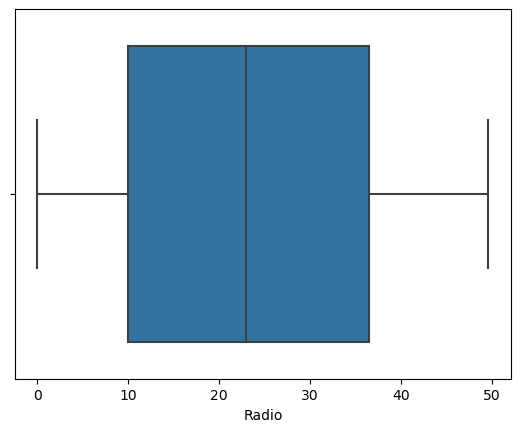

In [23]:
#Radio
sns.boxplot(data=data, x="Radio")

<Axes: xlabel='Newspaper'>

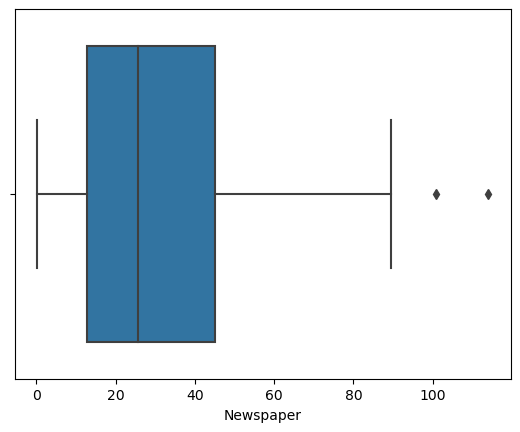

In [24]:
#Newspaper
sns.boxplot(data=data, x="Newspaper")

In [25]:
data.loc[data["Newspaper"]>90]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [27]:
#replace outlier with median

data.loc[data["Newspaper"]>90]= np.median(data["Newspaper"])

<Axes: xlabel='Newspaper'>

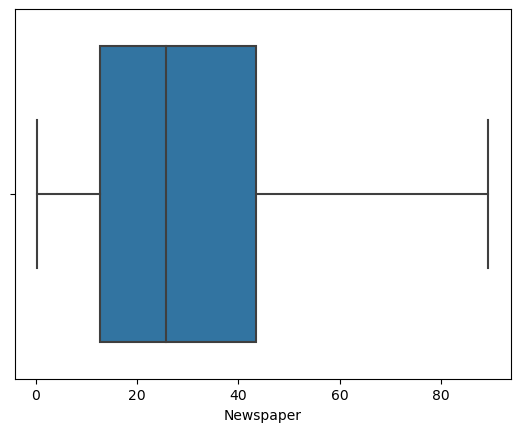

In [28]:
#Newspaper
sns.boxplot(data=data, x="Newspaper")

In [29]:
# 4. Feature selection

# check for highly correlated coln

data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.048973,0.052042,0.721132
Radio,0.048973,1.000000,0.345894,0.566254
Newspaper,0.052042,0.345894,1.000000,0.209691
Sales,0.721132,0.566254,0.209691,1.000000


<Axes: >

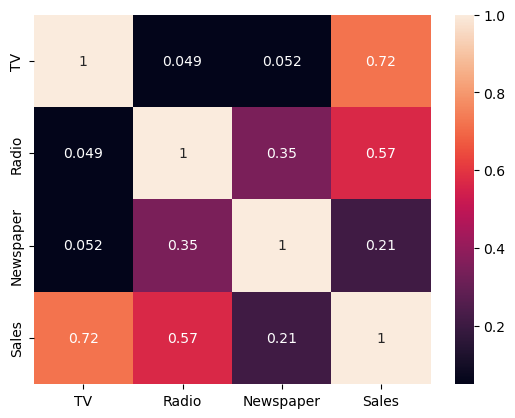

In [31]:
sns.heatmap(data.corr(),annot=True)

In [32]:
# 5. Model Selection

x = data.drop("Sales",axis = 1)          # independent feature... input col

y = data.Sales                           # dependent feature.... output col


In [35]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state= 44)

In [43]:
x_train

,TV,Radio,Newspaper
138,43.0,25.9,20.5
46,89.7,9.9,35.7
118,125.7,36.9,79.2
85,193.2,18.4,65.7
110,225.8,8.2,56.5
...,...,...,...
131,265.2,2.9,43.0
59,210.7,29.5,9.3
173,168.4,7.1,12.8
163,163.5,36.8,7.4


In [44]:
x_test.shape

(40, 3)

In [45]:
# 6. Model Building

from sklearn.linear_model import LinearRegression

model= LinearRegression()                             # object creation
model.fit(x_train,y_train)                            # to train model

LinearRegression()

In [47]:
# prediction

y_pred = model.predict(x_test)                                # y_pred=== prediction
                                                              # y_test -- actual                          diff: error

In [48]:
y_pred

array([14.82417718, 10.15931022, 10.20369917, 19.45159085, 16.57947452,
       10.01062933, 20.40469955, 17.91102934, 15.95256282, 19.4242639 ,
       10.81367966, 21.26679991,  7.04187633, 17.45595094, 12.60342882,
       19.09263972, 16.82782192, 15.375656  , 17.42493511, 21.89022138,
       12.29264555, 11.34439421, 19.36710834, 12.55195998, 11.22431294,
        7.97379199, 13.92003546, 12.29641811, 18.32018385, 15.81667443,
       16.21942332, 13.31265487, 14.14249478, 14.53655558, 16.55193795,
       14.01248607, 11.14455178, 17.31978207, 17.34587945,  8.40874677])

In [49]:
# to check error

from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred)

3.2639686704981785

In [50]:
r2_score(y_test, y_pred)    

# it gives the correct indication about model performance
# evaluates the performance of regression model

# range[0 to 1],  if r2 score near to 1-- best condition
#                 if r2 score near to 0 -- worst condition

0.8162759112837068

In [ ]:
# prob with r2

#as feature increases r2 score increases

# adjusted r2_score


adjusted_r2 = 1-(1- r2_score) * (n-1)/ (n-k-1)                            # n -- no of samples
                                                                    # k -- no of independent features/ coln -- 3

In [52]:
adjusted_r2 = 1-(1- 0.81)*(40 -1)/ (40-3-1)
adjusted_r2

0.7941666666666667